In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [2]:
df=pd.read_excel("store.xls")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
pd.set_option('display.max_columns', None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df.isnull().sum().sum()

0

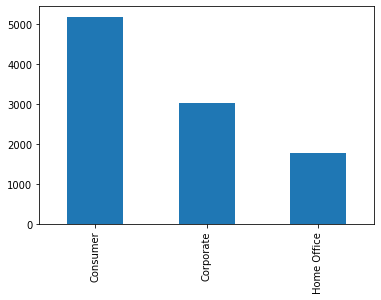

In [10]:
df["Segment"].value_counts().plot(kind="bar")

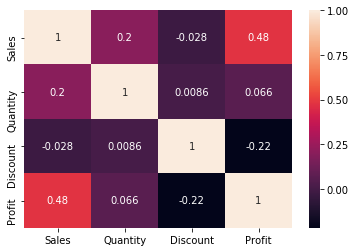

In [11]:
data=df[['Sales','Quantity','Discount','Profit']]
sns.heatmap(data.corr(),annot=True)

**Here we can observe that there is a positive correlation between Profit and sales
i.e when sales increases profit laos increases.**

In [12]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

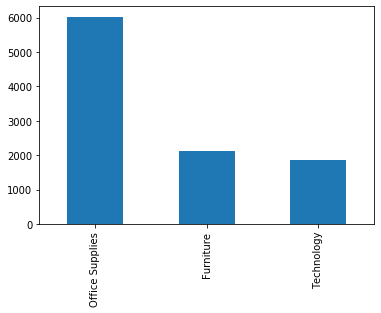

In [13]:
df['Category'].value_counts().plot(kind="bar")

**Here it can be observed that the sale of office supplies is way higher than that of the other two categories**

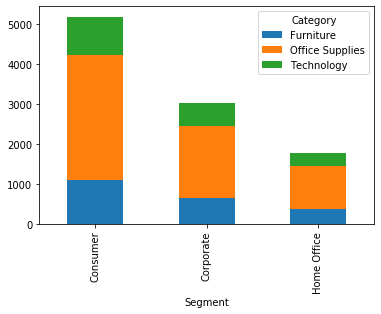

In [14]:
pd.crosstab(df['Segment'],df['Category']).plot(kind="bar",stacked=True)

**The graph shows the differnt category under each segment**


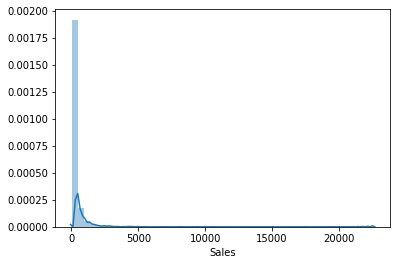

In [15]:
sns.distplot(df["Sales"])

In [16]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**It can be observed that the data here is higly right skewed**

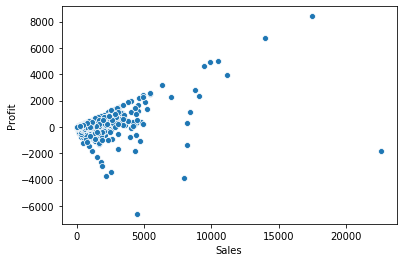

In [17]:

sns.scatterplot("Sales",'Profit',data=df)

**Here it can be seen that it is not necessary that with the increase in sale profit increases.**

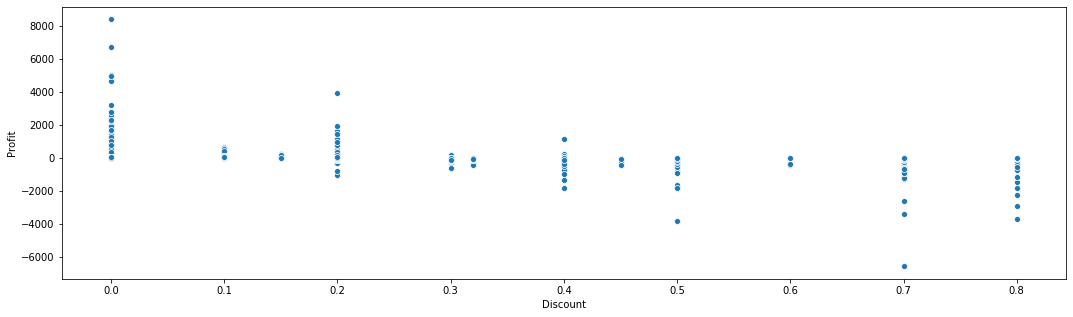

In [18]:
axes,fig=plt.subplots(0,1,figsize=(18,5))
sns.scatterplot("Discount",'Profit',data=df)

**Here it can be observed that when the discount is till 0.3, there is a profit.**

**But if the discount increases beyond 0.3 there is a loss happening**

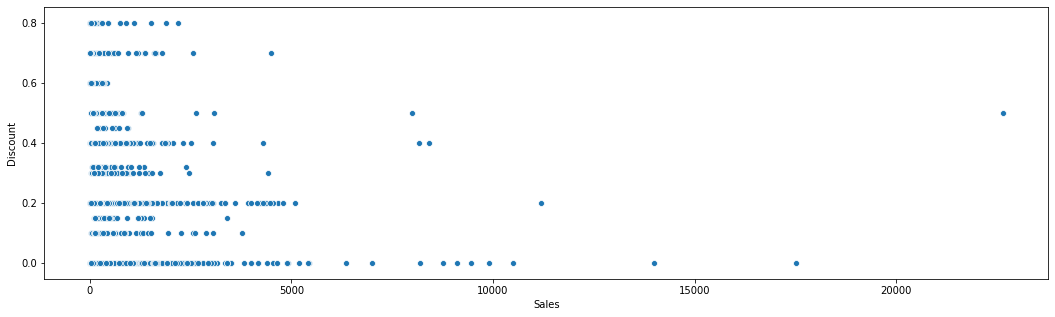

In [19]:
axes,fig=plt.subplots(0,1,figsize=(18,5))
sns.scatterplot('Sales','Discount',data=df)

**AFTER A POINT WHEN DISCOUNT IS INCREASING THE TOTAL SALES AMOUNT IS DECREASING**

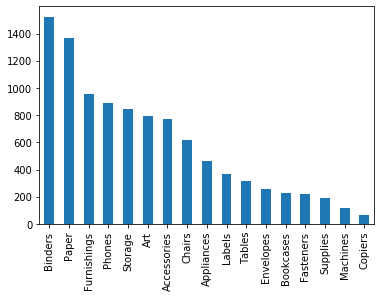

In [20]:
df['Sub-Category'].value_counts().plot(kind="bar")

**THE SUB-CATEGORY IS ARRANGED ON THE BASIS OF MOST SELLING PRODUCTS**

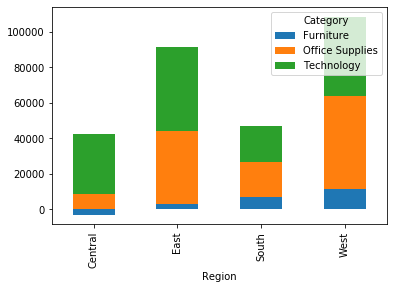

In [21]:
pd.crosstab(df["Region"],df["Category"],df["Profit"],aggfunc='sum').plot(kind="bar",stacked=True)

**There is more profit from the East an west regions**

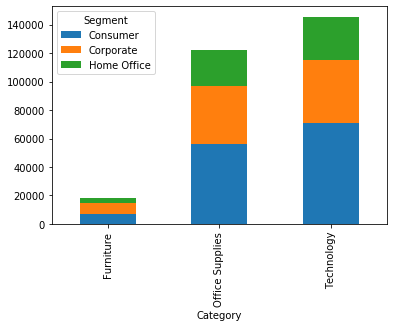

In [22]:
pd.crosstab(index=df["Category"],columns=df["Segment"],values=df["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)

**Although office supplies is the most selling category but the profit is highest from the technology sector
Under Technology the purchasing ie the profit has comE  more  from the  Consumers segment**

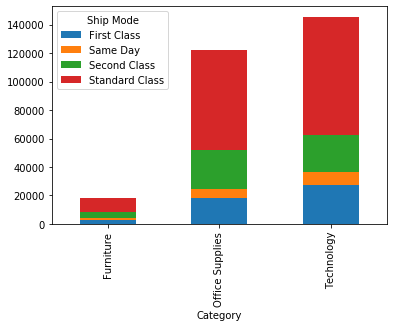

In [23]:
pd.crosstab(index=df["Category"],columns=df["Ship Mode"],values=df["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)

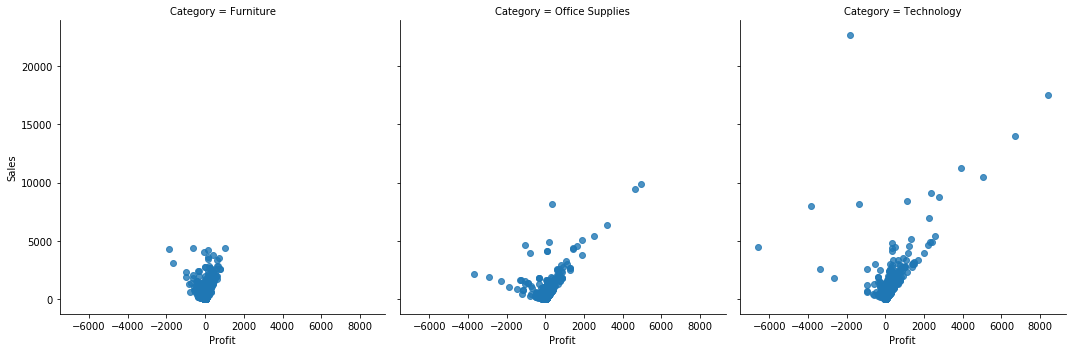

In [24]:
sns.lmplot(x="Profit",y="Sales",data=df,fit_reg=False,col="Category")
plt.show()

**The profit is very low almost 0 in the Furniture sector
also the profit is high in the Technology sector**

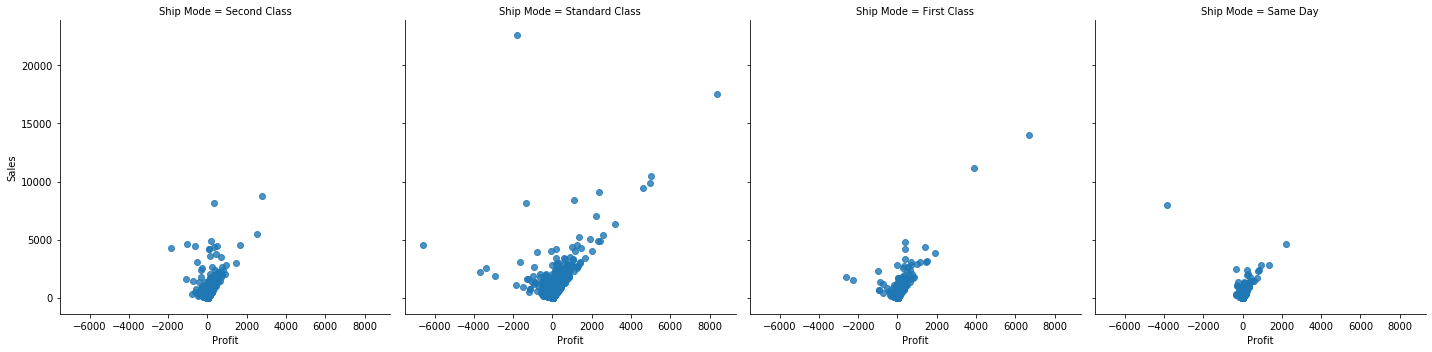

In [25]:
sns.lmplot(x="Profit",y="Sales",data=df,fit_reg=False,col="Ship Mode")

**The profit is very high when the ship mode is Standard class**

**NO or very less profit when the ship mode is same day**

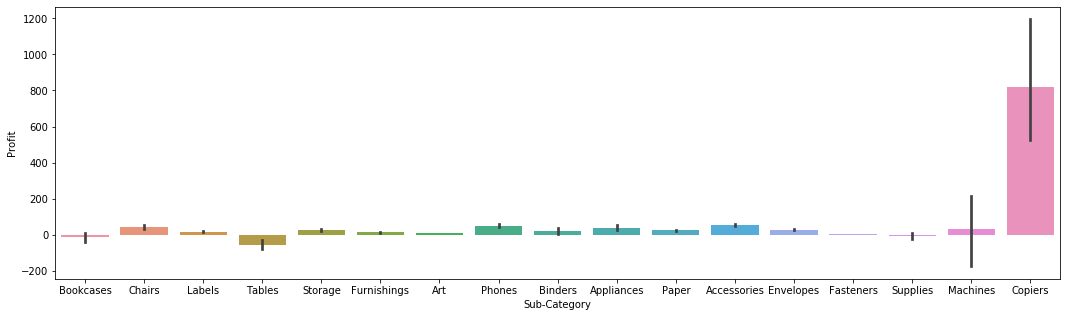

In [30]:
axes,fig=plt.subplots(0,1,figsize=(18,5))
sns.barplot("Sub-Category","Profit",data=df)

**HERE IT CAN BE OBSERVED THE PROFIT OR THE LOSSES WITH RESPECT TO THE EACH SUB CATEGORY**
**TABLE,BOOKCASES,FASTENERS ARE BASICALLY IN LOSS**
**PROFIT IS HIGHEST FROM THE COPIERS SUB-CATEGORY**

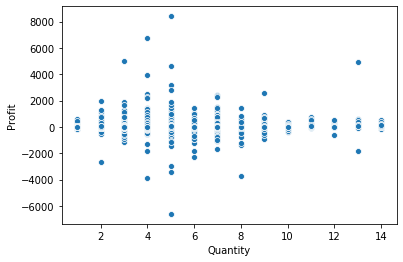

In [36]:
sns.scatterplot("Quantity","Profit",data=df)

## THE FINAL INSIGHTS

**1. When the discount is till 0.3, there is a profit,But if the discount increases beyond 0.3 there is a loss happening**

**2.Although office supplies is the most selling category but the profit is highest from the technology sector Under which the  the profit has come more from the Consumers segment**

**3.Although Copiers is the least selling sub-category but has given the most profit out of all the sub-categories.**

**4.There is a huge loss from the furniture section**

**5.The profit is high when the ship mode is "Standard Class" and the Profit is negligible when the ship Mode is "Same day"**

**6.The profit is more from the east and west region of the country.**


##  SUGGESTIONS TO THE BUSSINESS

**1.THE DISCOUNT SHOULD NOT BE INCREASED BEYOND 0.3.**

**2.THE FURNITURE CATEGORY IS CAUSING A LOT OF LOSS, SO THE COMPANY CAN STOP SELLING FURNITURES OR SHOULD INCREASE THE PRICE OF THE FURNITURE CATEGORY OR CAN TRY TO REDUCE THE OVERALL COST OF THE PRODUCT**

**3.IF THE SHIPPING MODE IS "SAME DAY", THE SHIPPING CHARGES SHOULD BE INCREASED.**

**4.THE COMPANY SHOULD FOCUS MORE ON THE TECHNOLOGY SECTION**